In [103]:
import pyreadr as pr
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas


warnings.filterwarnings('ignore')
%matplotlib inline

In [101]:
loadr = pr.read_r('datosEcoTrim.Rda')
loadr.keys()
rdata = loadr['datosEcoTrim']
rdata.head()

,trimestre,expetativa.precios,imae,ipmpi,inflacion,ip.pman,ip.ps,ismn,ismr,pib,tbp,tc.compra,tc.venta,tpm,formacionBcapitalF
0,2009-01-01,4.062233,-0.131096,12.785381,3.537912,-4.169328,8.222479,9.142685,5.412098,6.219211e+06,9.372283,567.559348,577.666630,9.000000,1.096711e+06
1,2009-04-01,6.240130,-4.717733,-40.254744,12.857098,12.756396,16.404520,15.271206,2.139097,6.095089e+06,11.750000,556.561889,566.427889,10.000000,1.075168e+06
2,2009-07-01,5.861703,-5.103691,-45.127549,9.823510,5.153998,14.486423,15.271206,4.973259,6.129268e+06,11.354396,568.918242,578.688681,10.000000,1.122094e+06
3,2009-10-01,5.405170,-2.642436,-36.911563,5.816067,-4.363560,10.908471,9.142685,3.144689,6.489651e+06,11.722826,580.503152,589.997391,9.163043,1.169924e+06
4,2010-01-01,3.642820,4.136243,17.170425,5.730029,3.028953,7.282007,9.279351,3.358149,6.543471e+06,7.472826,504.494239,514.831957,6.717391,1.093531e+06


In [102]:
loadr = pr.read_r('datosEcoTrim2010.Rda')
loadr.keys()
rdata = loadr['datosEcoTrim2010']
rdata.head()

,trimestre,expetativa.precios,imae,ipmpi,inflacion,ip.pman,ip.ps,ismn,ismr,pib,tbp,tc.compra,tc.venta,tpm,formacionBcapitalF,desempleo
0,2010-07-01,4.113090,4.445072,28.123587,6.033641,3.789914,7.958902,7.109248,1.015438,6.485904e+06,8.115385,521.212198,531.580330,9.000000,1.203865e+06,8.616859
1,2010-10-01,3.663587,4.708403,14.043394,5.296350,1.830135,6.404933,9.279351,3.783420,6.796036e+06,8.051630,510.258913,520.611630,8.298913,1.219068e+06,9.213320
2,2011-01-01,3.214230,4.617695,6.876327,4.739169,9.343093,4.807831,5.771242,0.985586,6.830432e+06,7.929348,503.865326,515.036739,5.000000,1.091437e+06,9.808034
3,2011-04-01,3.419290,3.746018,31.955667,4.664230,6.031891,5.039502,6.807830,2.048210,6.754869e+06,7.547222,498.090556,508.418222,6.500000,1.142741e+06,9.964216
4,2011-07-01,3.157123,4.183721,35.766989,4.901002,10.871600,4.691788,6.807830,1.818131,6.736463e+06,7.228022,497.500440,508.283736,6.054945,1.239719e+06,10.930072


# 1.  Elabore un modelo de regresión múltiple para explicar el comportamiento del desempleo, empleando como variables explicativas el producto interno bruto (PIB), la inflación, el índice de salarios mínimos nominales y la formación bruta de capital, teniendo en cuenta las siguientes descripciones sobre las variables contenidas en la base de datos:

-   inflacion: Inflación trimestral

-   pib: PIB trimestral, en colones

-   ismn: Índice de salarios mínimos nominales trimestral

-   formacionBcapitalF: Formación bruta de capital fijo trimestral, en colones

In [104]:
mod = smf.ols(formula='desempleo ~ inflacion + pib + ismn + formacionBcapitalF', data=rdata)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              desempleo   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     3.427
Date:                Sun, 12 Mar 2023   Prob (F-statistic):             0.0158
Time:                        16:25:38   Log-Likelihood:                -125.86
No. Observations:                  50   AIC:                             261.7
Df Residuals:                      45   BIC:                             271.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.2559      9

# 2.  Interprete los resultados de la regresión realizada en el punto 1. Refierase a la significancia de los coeficientes, las pruebas de hipotesis, R2 ajustado y prueba F.

En este caso, solo la variable "formación bruta de capital fijo" tiene un valor P menor a 0.05, lo que indica que es la única variable independiente significativa en la regresión.

En este caso, el R-cuadrado ajustado es de 0.165, lo que indica que el modelo no es muy efectivo en explicar la variación en la tasa de desempleo.

La probabilidad F es de 0.0158, lo que indica que al menos una de las variables independientes tiene un efecto significativo en la tasa de desempleo. Sin embargo, dado que solo una variable independiente tiene un valor P significativo, esto sugiere que el modelo no es muy efectivo en explicar la variación en la tasa de desempleo.

In [105]:
df = rdata.rename(columns={'expetativa.precios': 'expectativa'})
mod2 = smf.ols(formula='np.log(desempleo) ~ np.log(expectativa)+ np.log(pib) + np.log(ismn) + np.log(formacionBcapitalF)-1', data=df)
res2 = mod2.fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:      np.log(desempleo)   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1745.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                    1.40e-49
Time:                        16:25:41   Log-Likelihood:                          10.764
No. Observations:                  50   AIC:                                     -13.53
Df Residuals:                      46   BIC:                                     -5.880
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

El modelo tiene un buen ajuste ya que el R-cuadrado ajustado es 0.993, lo que significa que el 99.3% de la variación del desempleo se explica por las variables independientes. 

El coeficiente de logaritmo de la expectativa es -0.2241, lo que significa que un aumento del 1% en la expectativa se asocia con una disminución del 0.2241% en el desempleo. El coeficiente de logaritmo del PIB es 0.8245, lo que significa que un aumento del 1% en el PIB se asocia con un aumento del 0.8245% en el desempleo. El coeficiente de logaritmo del índice de manufactura es -0.0304, pero no es estadísticamente significativo. Finalmente, el coeficiente de logaritmo de la formación bruta de capital fijo es -0.7387, lo que significa que un aumento del 1% en la formación bruta de capital fijo se asocia con una disminución del 0.7387% en el desempleo.

Ademas En este caso, se observa que los coeficientes de expectativa, de pib y formacionBcapitalF son significativos al nivel de confianza del 95%, ya que sus p-valores son 0.045, 0.009, 0.034 respectivamente. Mientras que los coeficientes de np.log(ismn), no es significativos al nivel de confianza del 95%




# 1.Elabore gráficos de dispersión para las variables en análisis. Además, señale que puede concluir de cada gráfico.

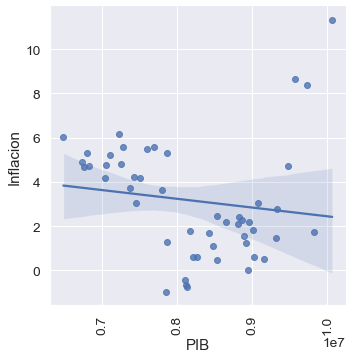

In [106]:
sns.lmplot(x="pib", y="inflacion", data=df);
plt.xlabel('PIB')
plt.ylabel('Inflacion')
plt.xticks(rotation=90)
plt.show()

En este caso no existe una relacion tan fuerte en la relacion entre el PIB y la inflacion, en la cual se puede observar dos periodos en los que la serie de tiempo cambia en uno con Inflacion muy alta y PIB muy bajo y otro con inflacion muy baja y PIB muy alto

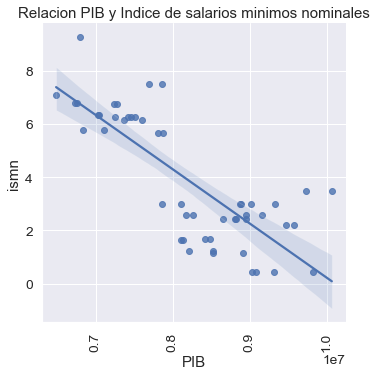

In [107]:
sns.lmplot(x="pib", y="ismn", data=df);
plt.xlabel('PIB')
plt.ylabel('ismn')
plt.xticks(rotation=90)
plt.title('Relacion PIB y Indice de salarios minimos nominales')
plt.show()

En este caso tambien se puede observar que hubo un periodo con salarios minimos nominales muy altos pero un pib muy bajo, por otro lado tambien se puede observar que hubo salarios bajos pero un PIB muy alto

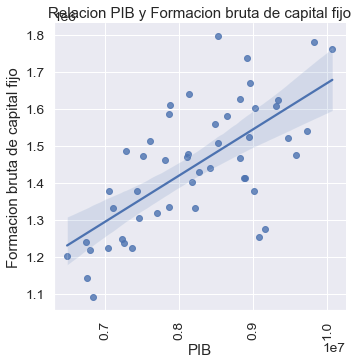

In [108]:
sns.lmplot(x="pib", y="formacionBcapitalF", data=df);
plt.xlabel('PIB')
plt.ylabel('Formacion bruta de capital fijo')
plt.xticks(rotation=90)
plt.title('Relacion PIB y Formacion bruta de capital fijo')
plt.show()

En este caso se puede observar una relacion bastante fuerte en lo que es la formacion bruta de capital y el aumento en el PIB del pais, por lo que se puede concluir que hay una relacion positiva.

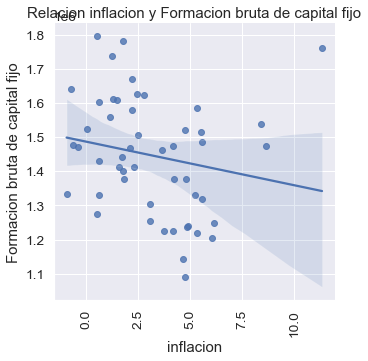

In [62]:
sns.lmplot(x="inflacion", y="formacionBcapitalF", data=df);
plt.xlabel('inflacion')
plt.ylabel('Formacion bruta de capital fijo')
plt.xticks(rotation=90)
plt.title('Relacion inflacion y Formacion bruta de capital fijo')
plt.show()

En este caso los datos estan muy dispersos por lo que se puede concluir que la relacion es debil y explica de poca manera el comportamiento de la inflacion

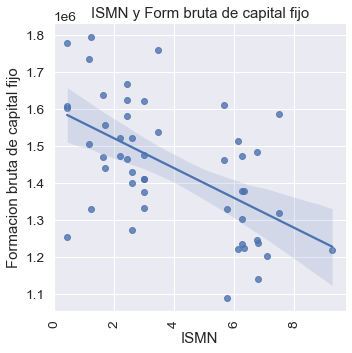

In [111]:
sns.lmplot(x="ismn", y="formacionBcapitalF", data=df);
plt.xlabel('ISMN')
plt.ylabel('Formacion bruta de capital fijo')
plt.xticks(rotation=90)
plt.title('ISMN y Form bruta de capital fijo')
plt.show()

En este caso hay dos grupos de datos en lo que se obtuvo una alta inversion pero un bajo indice de salario nominal y por otro lado un baja inversion pero un alto indice de salario.

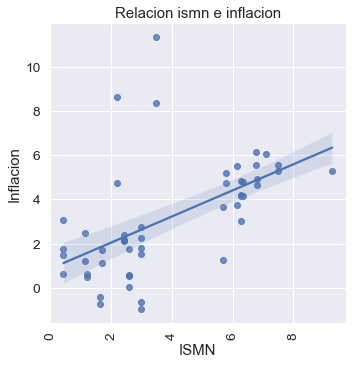

In [112]:
sns.lmplot(x="ismn", y="inflacion", data=df);
plt.xlabel('ISMN')
plt.ylabel('Inflacion')
plt.xticks(rotation=90)
plt.title('Relacion ismn e inflacion')
plt.show()

En este caso se puede apreciar una relacion positiva entre los conjuntos de datos, entre mayor es la inflacion mayor es el indice de salarios minimos, por lo que si explica el comportamiento

# 2.Elabore la matriz de correlación entre variables e interprete los resultados.

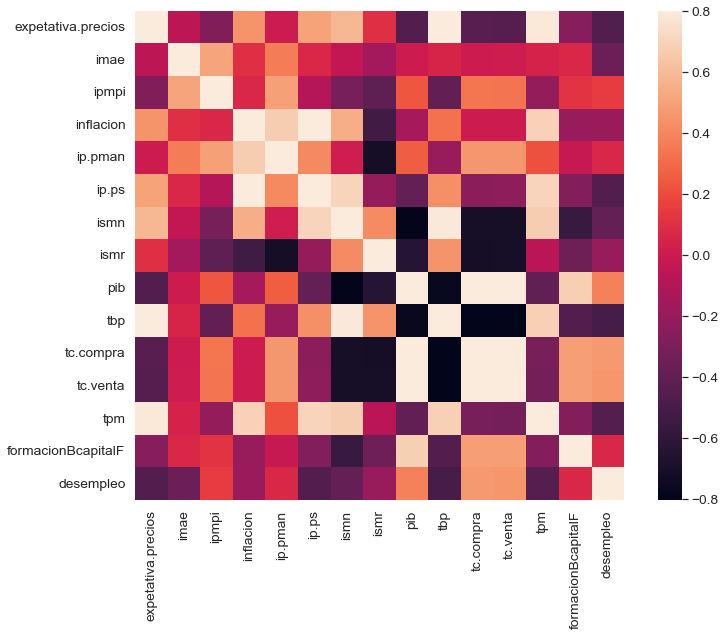

In [113]:
corrmat = rdata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

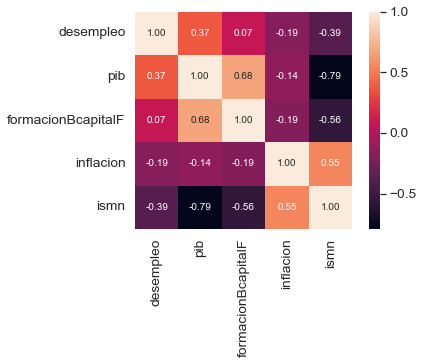

In [114]:
columns_to_keep = ['desempleo', 'inflacion', 'pib', 'ismn', 'formacionBcapitalF']
subset_data = df[columns_to_keep]
corrmat = subset_data.corr()
k = 5
cols = corrmat.nlargest(k, 'desempleo')['desempleo'].index
selected_data = subset_data[cols]
cm = selected_data.corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



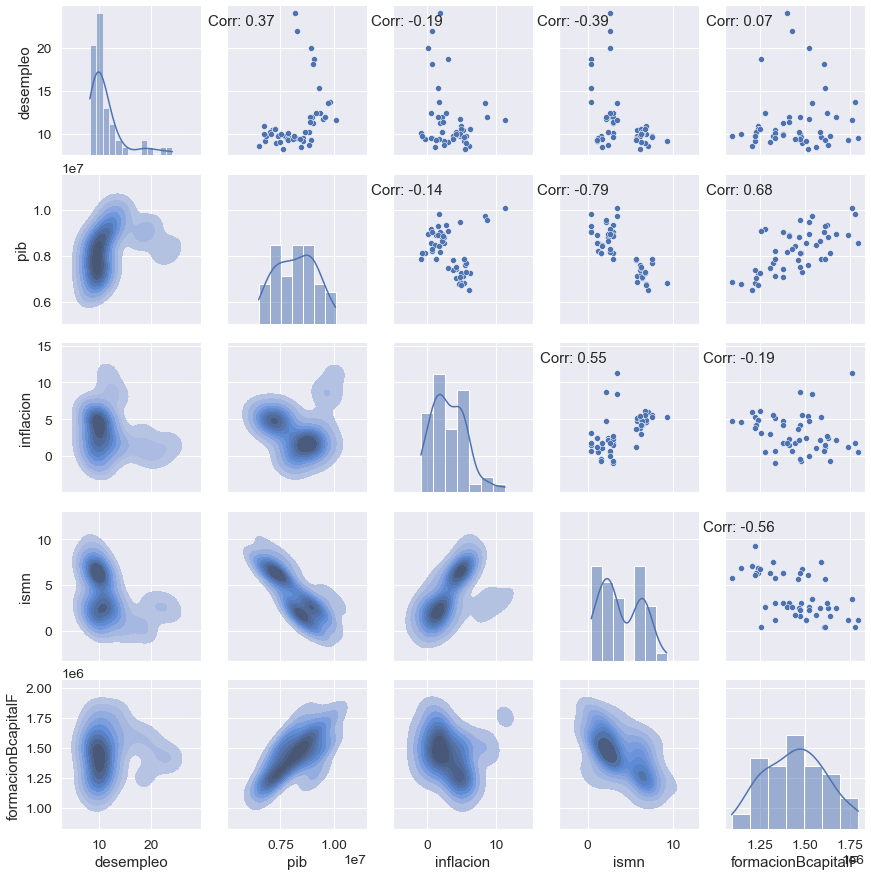

In [115]:
columns_to_keep = ['desempleo', 'pib', 'inflacion', 'ismn', 'formacionBcapitalF']
subset_data = df[columns_to_keep]
corrmat = subset_data.corr()
g = sns.PairGrid(subset_data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
for i, j in zip(*plt.np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].annotate("Corr: {:.2f}".format(corrmat.values[i, j]), xy=(.1, .9), xycoords='axes fraction', ha='center', va='center')


# 3.  Con base a los resultados obtenidos en el punto 1 y 2 ¿cree usted que puedan existir problemas de multicolinealidad en la regresión realizada?

En este caso no parecen existir problemas de multicolinealidad demasiado altas ya que los p valor se encuentra de sigficancia a exception de ismn, ademas no parecen existir correlaciones extremadamente altas en la mtriz

# 1.  Determine el factor de inflación de la varianza para la regresión realizada e interprete los resultados.

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

columns_to_keep = ['desempleo', 'pib', 'inflacion', 'ismn', 'formacionBcapitalF']
subset_data = df[columns_to_keep]

In [117]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = ['desempleo', 'pib', 'inflacion', 'ismn', 'formacionBcapitalF']

compute_vif(considered_features).sort_values('VIF', ascending=False)



,Variable,VIF
3,ismn,5.683120
1,pib,5.365503
2,inflacion,2.188019
4,formacionBcapitalF,2.059245
0,desempleo,1.304659


# Elabore sus interpretaciones o conclusiones en este espacio:



En este caso se puede decir que hay dos variables con problemas de multicolinealidad el pib y el ismn, por lo que pueden existir grandes problemas de multicolinealidad.

# 3.  Cree un modelo de regresión con las correcciones realizadas en el punto anterior. Además, vuelva a determinar el factor de inflación de la varianza e interprete los resultados.

In [118]:
mod2 = smf.ols(formula='np.log(desempleo) ~ np.log(expectativa)+ np.log(pib) + np.log(ismn) + np.log(formacionBcapitalF)-1', data=df)
res2 = mod2.fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:      np.log(desempleo)   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1745.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                    1.40e-49
Time:                        16:27:14   Log-Likelihood:                          10.764
No. Observations:                  50   AIC:                                     -13.53
Df Residuals:                      46   BIC:                                     -5.880
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [130]:
columns_to_keep = ['desempleo', 'pib', 'expectativa', 'ismn', 'formacionBcapitalF']
subset_data = df[columns_to_keep]
def compute_vif(considered_features):
    
    X = df[considered_features]
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

considered_features = ['desempleo', 'pib', 'expectativa', 'ismn', 'formacionBcapitalF']

vif_df = compute_vif(considered_features).sort_values('VIF', ascending=False)

vif_df.set_index('Variable')


,VIF
Variable,
pib,3.632360
ismn,3.245368
formacionBcapitalF,2.014724
expectativa,1.690868
desempleo,1.423698


# Elabore sus interpretaciones o conclusiones en este espacio:

Luego de la correcion no se aprecian datos con problemas de multicolinealidad ya que la inflacion de la varianza se encuentra bajo el 5%. 

In [131]:
residuos = res2.resid
jb_test = sm.stats.stattools.jarque_bera(residuos)
print("Estadística de Jarque-Bera:", jb_test[0])
print("p-valor:", jb_test[1])

Estadística de Jarque-Bera: 83.35107831564783
p-valor: 7.953225813434291e-19


In [132]:
mod2 = smf.ols(formula='desempleo ~ expectativa + pib - 1', data=df)
res2 = mod2.fit()
print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:              desempleo   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              337.3
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                    5.45e-29
Time:                        16:29:55   Log-Likelihood:                         -126.98
No. Observations:                  50   AIC:                                      258.0
Df Residuals:                      48   BIC:                                      261.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [99]:
residuos = res2.resid
jb_test = sm.stats.stattools.jarque_bera(residuos)
print("Estadística de Jarque-Bera:", jb_test[0])
print("p-valor:", jb_test[1])

Estadística de Jarque-Bera: 83.35107831564783
p-valor: 7.953225813434291e-19


En este caso los residuos no se comportan de forma normal ya que el p valor del test esta bajo el rango de significancia del 5%